## <center>Tree Methods Project Exercise</center> 


**GOAL: Create a model to predict whether or not a customer will Churn.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/Lenovo/Desktop/Python/Machine Learning/Supervised Learning/Tree Methods/Data Sets/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Exploratory data analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**TASK: Get a quick statistical summary of the numeric columns with .describe() , you should notice that many columns are categorical, meaning you will eventually need to convert them to dummy variables.**

In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


**TASK:Display the balance of the class labels (Churn) with a Count Plot.**

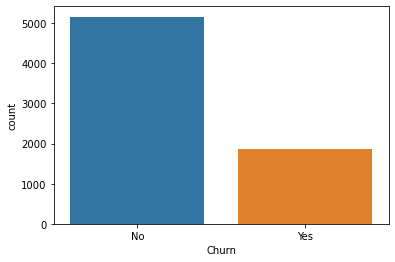

In [5]:
sns.countplot(data=df, x="Churn");

Unbalnaced distribution, we have more No's than Yes's

**TASK: Explore the distrbution of TotalCharges between Churn categories with a Box Plot or Violin Plot.**

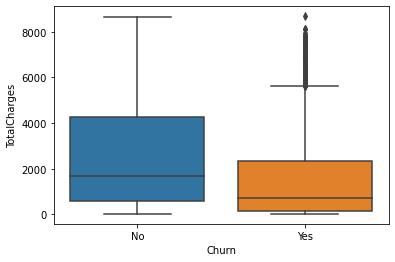

In [6]:
sns.boxplot(data=df, x="Churn", y="TotalCharges");

As it can be seen, there are more outliers in the yes section, than the no.

**TASK: Create a boxplot showing the distribution of TotalCharges per Contract type, also add in a hue coloring based on the Churn class.**

<AxesSubplot:xlabel='Contract', ylabel='TotalCharges'>

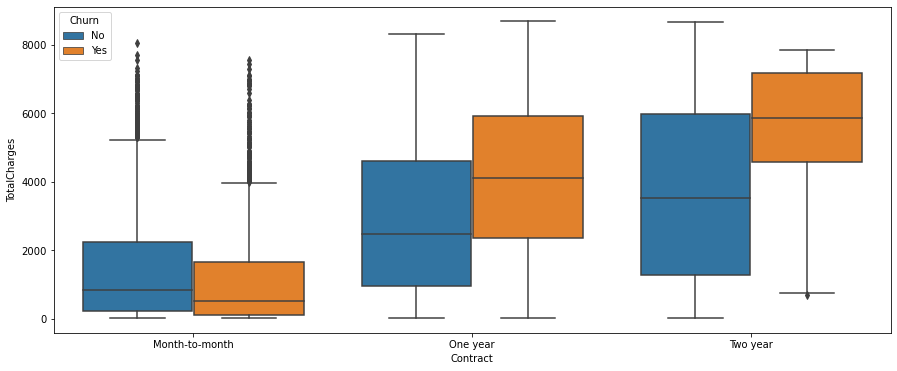

In [7]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x="Contract", y="TotalCharges", hue="Churn")

Month to month shows the most outliers, the rest of categories seem to fall inside the boxplots.

<img src='fig3.png' >

**TASK: Create a bar plot showing the correlation of the following features to the class label. Keep in mind, for the categorical features, you will need to convert them into dummy variables first, as you can only calculate correlation for numeric features.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

***Note, we specifically listed only the features above, you should not check the correlation for every feature, as some features have too many unique instances for such an analysis, such as customerID***

In [8]:
cat_cols = df.select_dtypes('object')
cat_cols.drop(columns=["customerID", "Churn"], inplace=True)

In [9]:
cols_list = [i for i in df.columns if i not in cat_cols.columns]
cols_list

['customerID',
 'SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [10]:
rest_cols = df[cols_list]
rest_cols

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,1,29.85,29.85,No
1,5575-GNVDE,0,34,56.95,1889.50,No
2,3668-QPYBK,0,2,53.85,108.15,Yes
3,7795-CFOCW,0,45,42.30,1840.75,No
4,9237-HQITU,0,2,70.70,151.65,Yes
...,...,...,...,...,...,...
7027,6840-RESVB,0,24,84.80,1990.50,No
7028,2234-XADUH,0,72,103.20,7362.90,No
7029,4801-JZAZL,0,11,29.60,346.45,No
7030,8361-LTMKD,1,4,74.40,306.60,Yes


In [11]:
cat_cols = pd.get_dummies(cat_cols, drop_first=True)
cat_cols

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,1,1,1,0,1,0,0,0,1,...,0,1,0,1,1,0,1,0,0,1
7028,0,1,1,1,0,1,1,0,0,0,...,0,1,0,1,1,0,1,1,0,0
7029,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
7030,1,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [12]:
df1 = pd.concat([cat_cols, rest_cols], axis=1)

In [13]:
my_map = {
    "No": 0,
    "Yes": 1
}

df1["Churn"] = df1["Churn"].map(my_map)

In [14]:
df1.corr()["Churn"].sort_values()[:-1]

tenure                                  -0.354049
Contract_Two year                       -0.301552
StreamingTV_No internet service         -0.227578
TechSupport_No internet service         -0.227578
DeviceProtection_No internet service    -0.227578
InternetService_No                      -0.227578
OnlineSecurity_No internet service      -0.227578
StreamingMovies_No internet service     -0.227578
OnlineBackup_No internet service        -0.227578
TotalCharges                            -0.199484
Contract_One year                       -0.178225
OnlineSecurity_Yes                      -0.171270
TechSupport_Yes                         -0.164716
Dependents_Yes                          -0.163128
Partner_Yes                             -0.149982
PaymentMethod_Credit card (automatic)   -0.134687
PaymentMethod_Mailed check              -0.090773
OnlineBackup_Yes                        -0.082307
DeviceProtection_Yes                    -0.066193
MultipleLines_No phone service          -0.011691


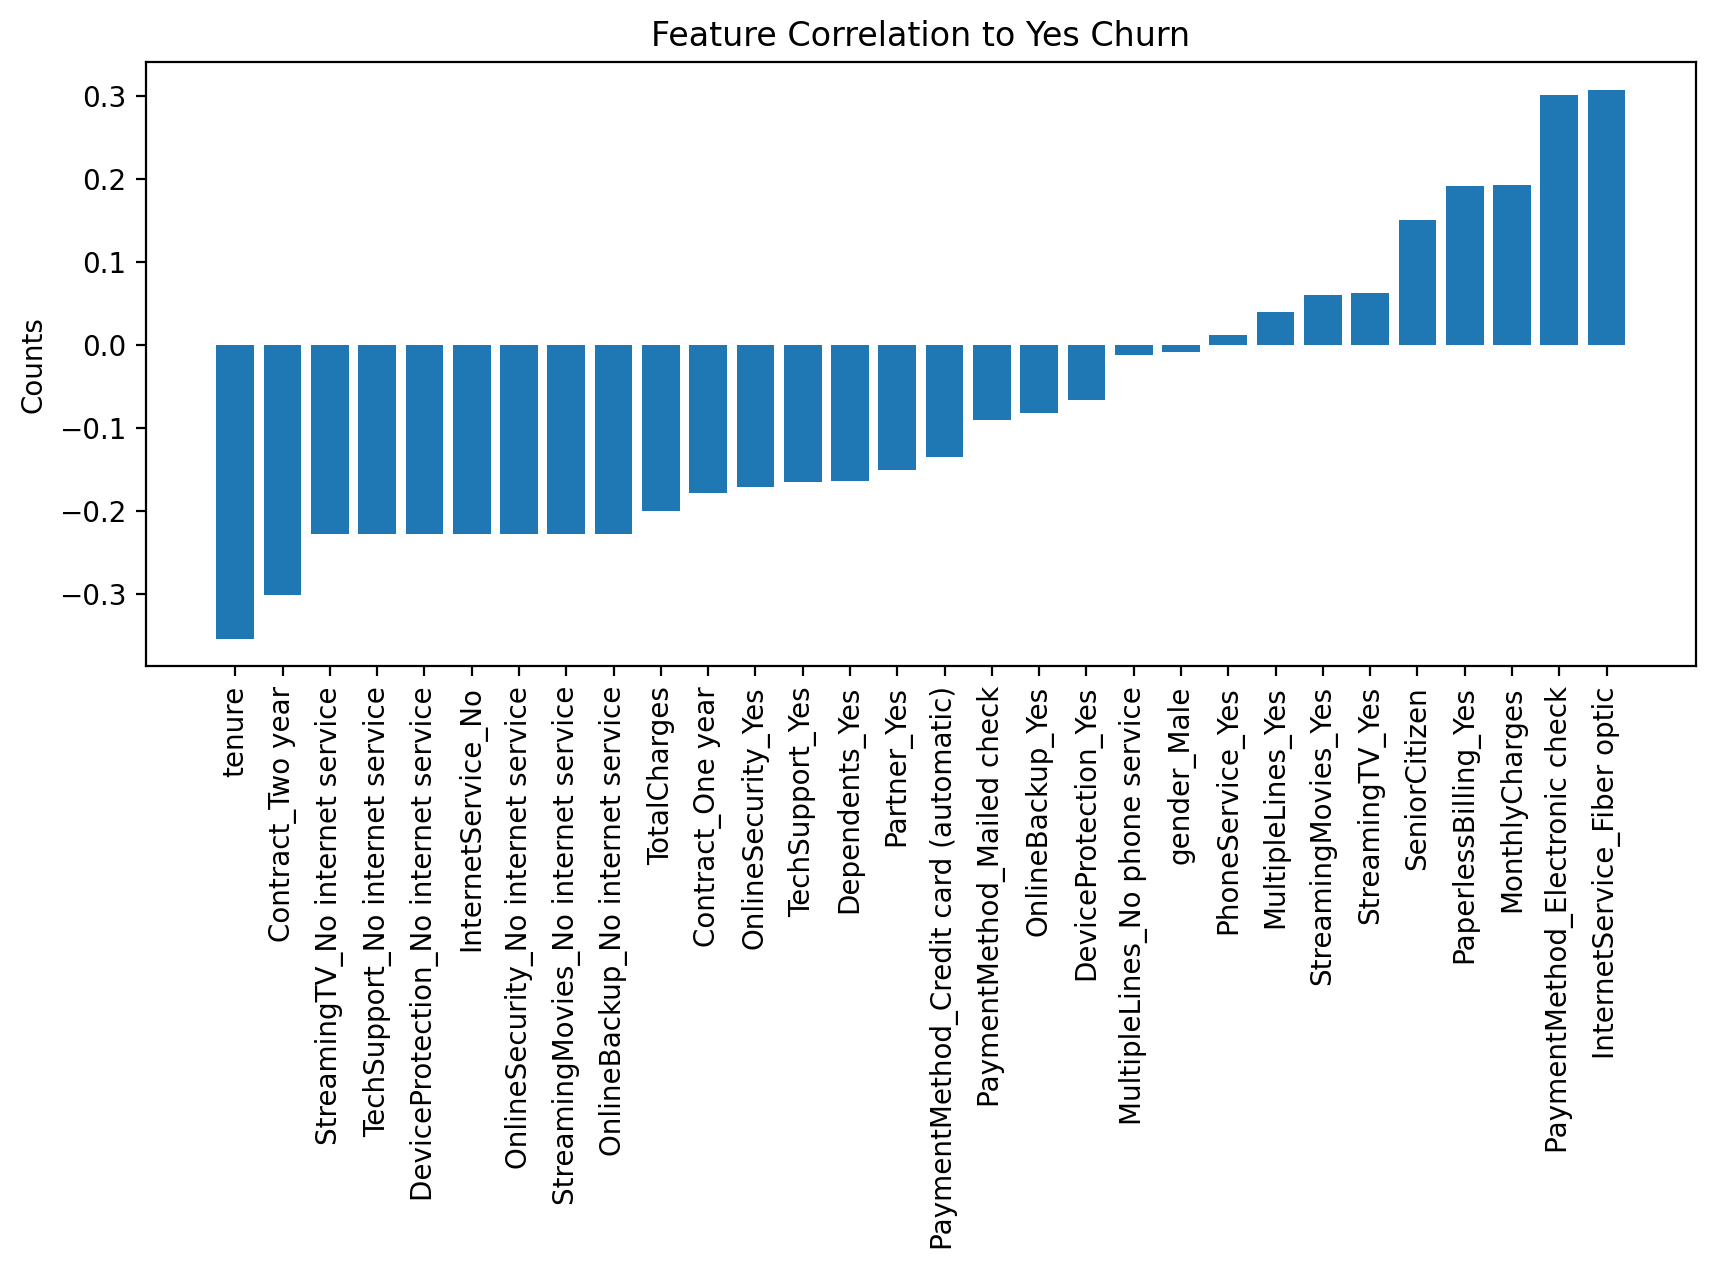

In [15]:
plt.figure(figsize=(10,4),dpi=200)
plt.bar(df1.corr()["Churn"].sort_values()[:-1].index, df1.corr()["Churn"].sort_values()[:-1])
plt.xticks(rotation=90)
plt.ylabel("Counts")
plt.title("Feature Correlation to Yes Churn");

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

**TASK: What are the 3 contract types available?**

In [16]:
df["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**TASK: Create a histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.**

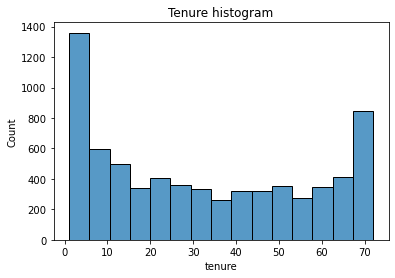

In [17]:
sns.histplot(data=df, x="tenure")
plt.title("Tenure histogram");

**TASK: Now use the seaborn documentation as a guide to create histograms separated by two additional features, Churn and Contract.**

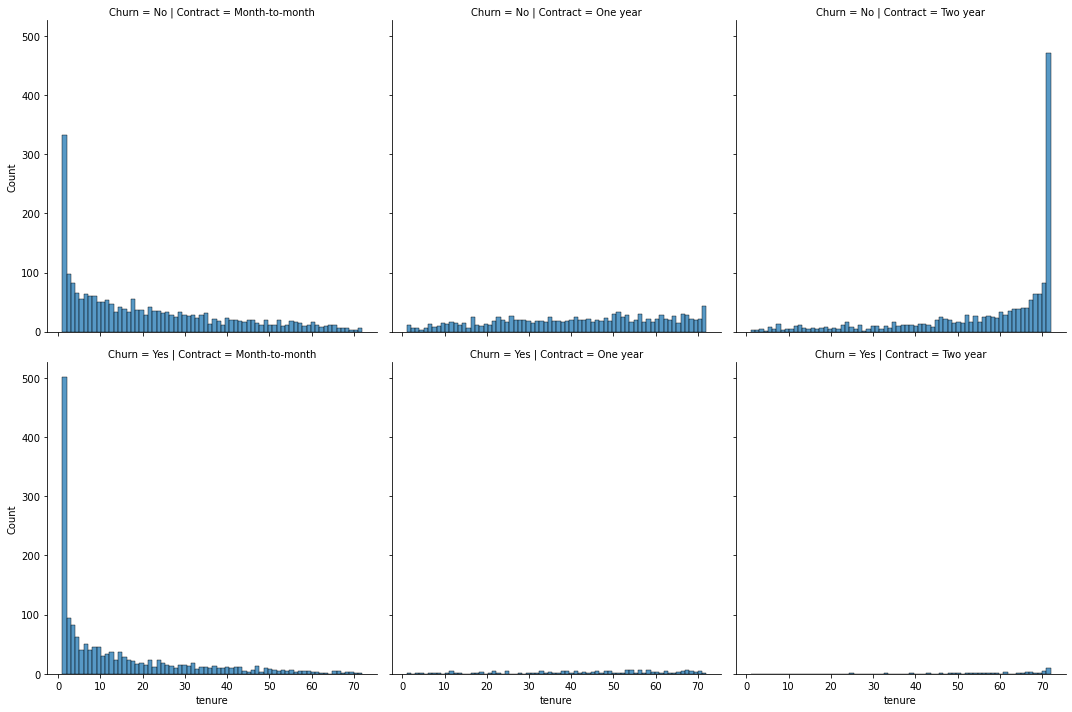

In [18]:
sns.displot(data=df,x='tenure',bins=70,col='Contract',row='Churn');

**TASK: Display a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.**

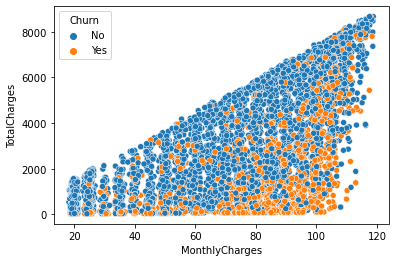

In [19]:
sns.scatterplot(data=df, x="MonthlyCharges", y="TotalCharges", hue="Churn");

#### Creating Cohorts based on Tenure

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

**TASK: Treating each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. You should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.**

In [20]:
a = df.groupby(by="tenure")["Churn"].value_counts()

In [21]:
percent = []
for i in range(1, 73):
    yes = a.loc[(i, "Yes")]
    no = a.loc[(i, "No")]

    percent.append(100*yes/(no+yes))

**TASK: Now that you have Churn Rate per tenure group 1-72 months, create a plot showing churn rate per months of tenure.**

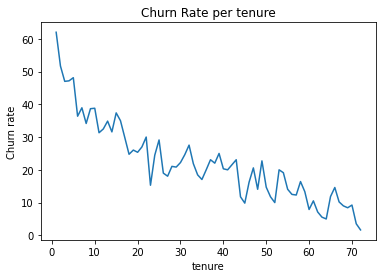

In [22]:
plt.plot(np.arange(1,73,1), percent)
plt.title("Churn Rate per tenure")
plt.xlabel("tenure")
plt.ylabel("Churn rate");

##### Broader Cohort Groups
**TASK: Based on the tenure column values, create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [23]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return "Over 48 Months"

df['Tenure Cohort'] = df['tenure'].apply(cohort)

**TASK: Create a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort defined in the previous task.**

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

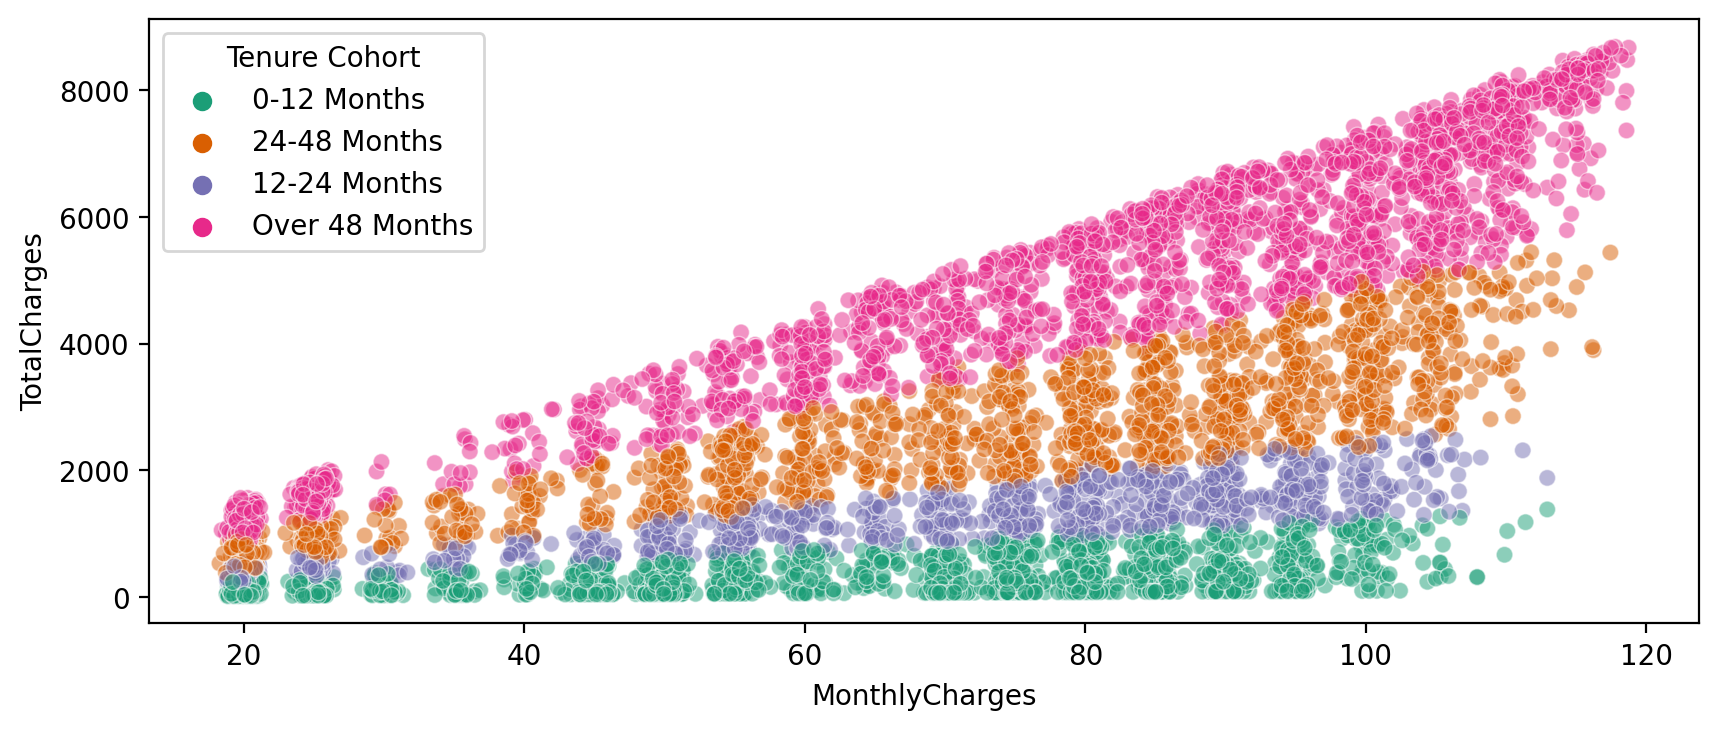

In [24]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Tenure Cohort', linewidth=0.5,alpha=0.5,palette='Dark2')

**TASK: Create a count plot showing the churn count per cohort.**

<AxesSubplot:xlabel='Tenure Cohort', ylabel='count'>

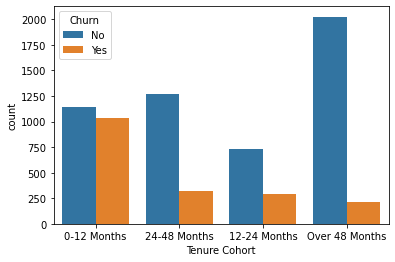

In [25]:
sns.countplot(data=df,x='Tenure Cohort',hue='Churn')

**TASK: Create a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.**

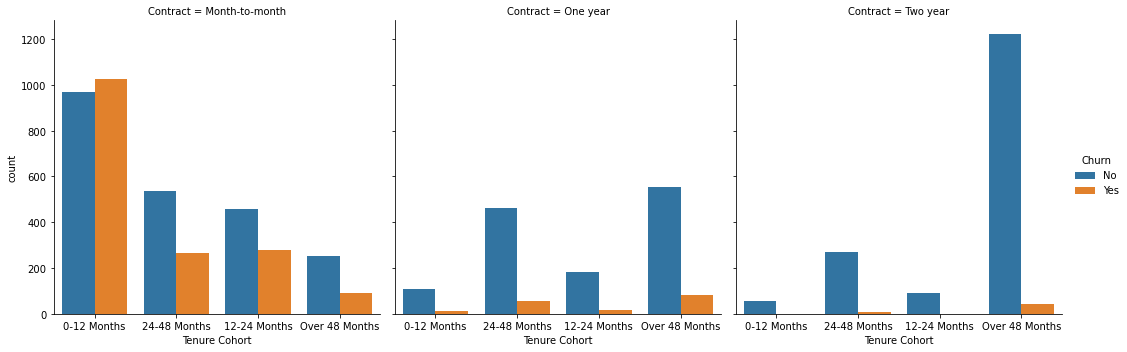

In [26]:
sns.catplot(data=df,x='Tenure Cohort',hue='Churn',col='Contract',kind='count');

### Predictive Modeling

**Let's explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting. Feel free to add any other supervised learning models to your comparisons!**

#### Single Decision Tree

**TASK : Separate out the data into X features and Y label. Create dummy variables where necessary and note which features are not useful and should be dropped.**

**TASK: Perform a train test split, holding out 10% of the data for testing. We'll use a random_state of 101 in the solutions notebook/video.**

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
df1.drop(columns="customerID", inplace=True)

X = df1.drop(columns="Churn")
y = df1["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**TASK: Decision Tree Perfomance. Complete the following tasks:**
   1. Train a single decision tree model (feel free to grid search for optimal hyperparameters).
   2. Evaluate performance metrics from decision tree, including classification report and plotting a confusion matrix.
   2. Calculate feature importances from the decision tree.
   4. OPTIONAL: Plot your tree, note, the tree could be huge depending on your pruning, so it may crash your notebook if you display it with plot_tree.

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [30]:
model = DecisionTreeClassifier()


param_grid = {
    "max_leaf_nodes": [11, 13, 15],
    "max_depth": [11, 13, 15]
    }

grid = GridSearchCV(model,cv=5, param_grid=param_grid)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [11, 13, 15],
                         'max_leaf_nodes': [11, 13, 15]})

In [31]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=11, max_leaf_nodes=15)

In [32]:
rgt = DecisionTreeClassifier(max_depth=11, max_leaf_nodes=15)
rgt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=11, max_leaf_nodes=15)

In [33]:
pred = rgt.predict(X_test)

In [34]:
confusion_matrix(y_test,pred)

array([[497,  60],
       [ 75,  72]], dtype=int64)

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


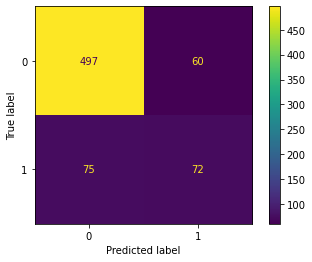

In [35]:
plot_confusion_matrix(rgt,X_test,y_test)

In [36]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       557
           1       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.80       704



In [37]:
pd.DataFrame(index=X.columns,data=rgt.feature_importances_,columns=['Feature Importance']).sort_values(by='Feature Importance')

,Feature Importance
gender_Male,0.000000
PaymentMethod_Credit card (automatic),0.000000
PaperlessBilling_Yes,0.000000
StreamingMovies_Yes,0.000000
StreamingMovies_No internet service,0.000000
StreamingTV_Yes,0.000000
StreamingTV_No internet service,0.000000
TechSupport_Yes,0.000000
DeviceProtection_Yes,0.000000
OnlineBackup_Yes,0.000000


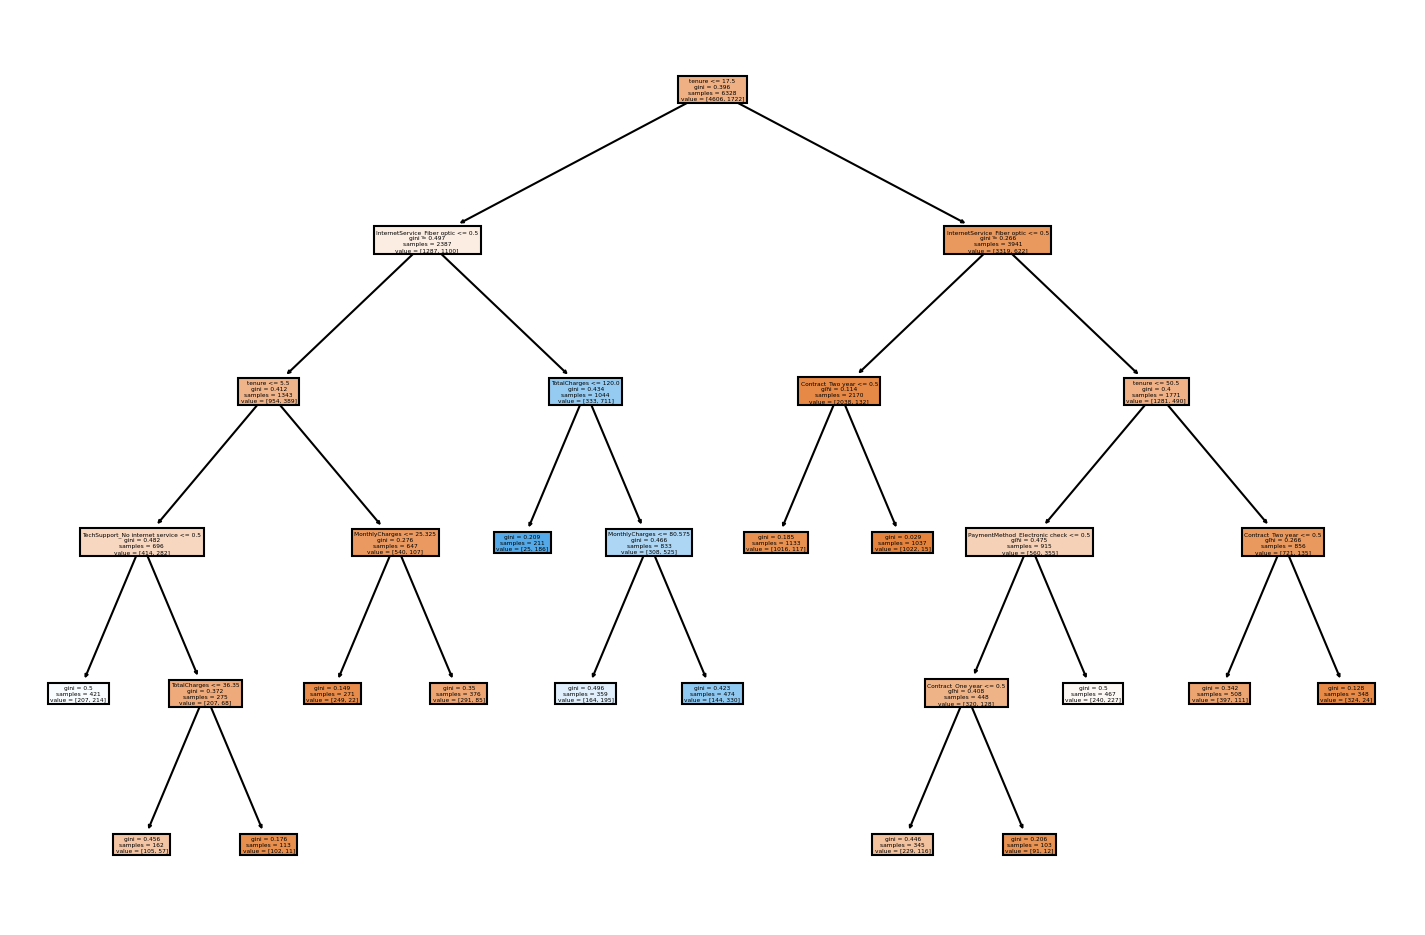

In [38]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(rgt,filled=True,feature_names=X.columns);

#### Random Forest

**TASK: Create a Random Forest model and create a classification report and confusion matrix from its predicted results on the test set.**

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
model = RandomForestClassifier()


param_grid = {
    "n_estimators": [64, 100, 200],
    "max_leaf_nodes": [11, 13, 15],
    "max_depth": [11, 13, 15]
    }

grid = GridSearchCV(model,cv=5, param_grid=param_grid)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [11, 13, 15],
                         'max_leaf_nodes': [11, 13, 15],
                         'n_estimators': [64, 100, 200]})

In [41]:
grid.best_estimator_ 

RandomForestClassifier(max_depth=13, max_leaf_nodes=15, n_estimators=64)

In [42]:
rfc = grid.best_estimator_
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=13, max_leaf_nodes=15, n_estimators=64)

In [43]:
pred = rfc.predict(X_test)
confusion_matrix(y_test,pred)

array([[518,  39],
       [ 86,  61]], dtype=int64)

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


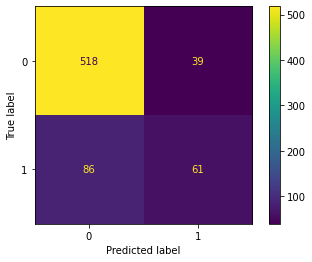

In [44]:
plot_confusion_matrix(rfc,X_test,y_test);

In [45]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       557
           1       0.61      0.41      0.49       147

    accuracy                           0.82       704
   macro avg       0.73      0.67      0.69       704
weighted avg       0.81      0.82      0.81       704



In [46]:
pd.DataFrame(index=X.columns,data=rfc.feature_importances_,columns=['Feature Importance']).sort_values(by='Feature Importance')

,Feature Importance
PhoneService_Yes,0.000151
gender_Male,0.000665
MultipleLines_No phone service,0.000828
PaymentMethod_Credit card (automatic),0.001304
PaymentMethod_Mailed check,0.001676
Dependents_Yes,0.001973
StreamingMovies_Yes,0.002156
MultipleLines_Yes,0.002303
Partner_Yes,0.003032
StreamingTV_Yes,0.003343


#### Boosted Trees

**TASK: Use AdaBoost or Gradient Boosting to create a model and report back the classification report and plot a confusion matrix for its predicted results**

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

In [48]:
gb_model = GradientBoostingClassifier()
param_grid = {"n_estimators":[1,5,10,20,40,100],'max_depth':[3,4,5,6]}

grid = GridSearchCV(gb_model,param_grid)
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [49]:
grid.best_estimator_ 

GradientBoostingClassifier()

In [50]:
gbc = grid.best_estimator_
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [51]:
pred = gbc.predict(X_test)
confusion_matrix(y_test,pred)

array([[503,  54],
       [ 74,  73]], dtype=int64)

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


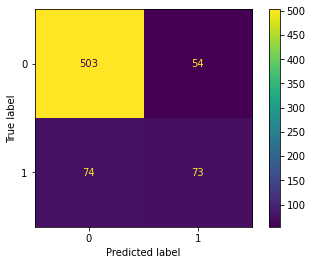

In [52]:
plot_confusion_matrix(gbc,X_test,y_test);

In [53]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       557
           1       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



In [54]:
pd.DataFrame(index=X.columns,data=rfc.feature_importances_,columns=['Feature Importance']).sort_values(by='Feature Importance')

,Feature Importance
PhoneService_Yes,0.000151
gender_Male,0.000665
MultipleLines_No phone service,0.000828
PaymentMethod_Credit card (automatic),0.001304
PaymentMethod_Mailed check,0.001676
Dependents_Yes,0.001973
StreamingMovies_Yes,0.002156
MultipleLines_Yes,0.002303
Partner_Yes,0.003032
StreamingTV_Yes,0.003343
